# Model Performance and Evaluation Method : bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark
- Simple Hyperprameter Tuning
- Hyperparameter Tuning Grid Search

> ## Data

In [80]:
import pandas as pd
import numpy as np

In [81]:
bankloan = pd.read_csv('bankloan.csv')

In [82]:
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [84]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [85]:
X = bankloan[fitur]
y = bankloan[target]

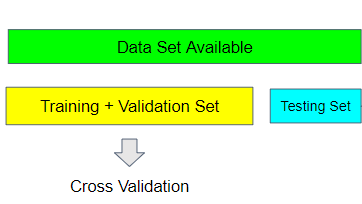

In [86]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2020)

> ## Model Evaluation : Benchmark

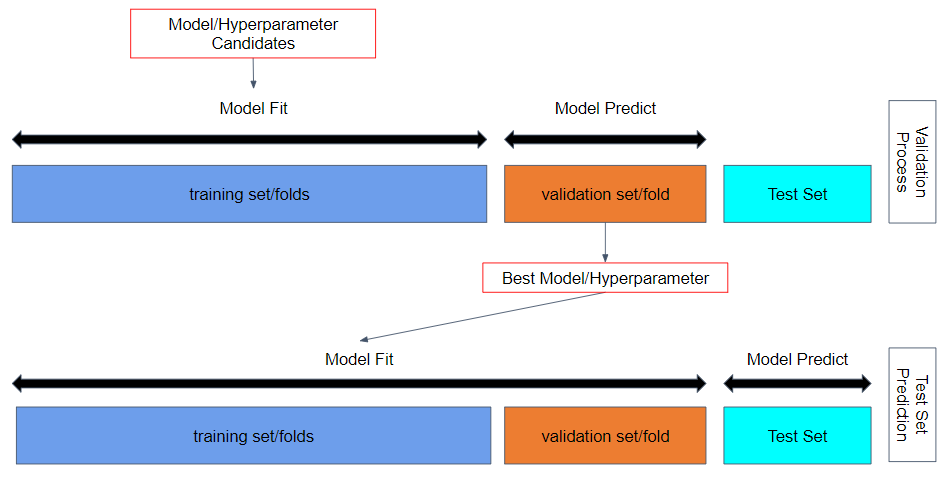

In [87]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [88]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

In [89]:
warnings.filterwarnings('ignore')

ACCURACY

In [90]:
skfold = StratifiedKFold(n_splits = 5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold)
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold)
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold)

In [91]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)

CV logreg [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV knn [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV tree [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


In [92]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())

CV logreg 0.020824828195876083
CV knn 0.024872121923543065
CV tree 0.057753434388557956


In [93]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())

CV logreg 0.8
CV knn 0.7428571428571429
CV tree 0.7714285714285716


RECALL

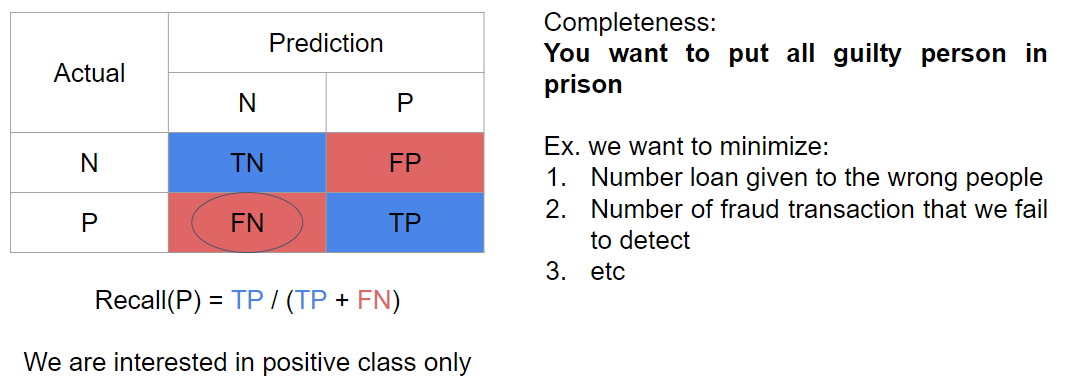

In [94]:
skfold = StratifiedKFold(n_splits = 5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring = 'recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring = 'recall')
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold, scoring = 'recall')

In [95]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)

CV logreg [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV knn [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV tree [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


In [96]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())

CV logreg 0.08992003317520893
CV knn 0.06021759987018779
CV tree 0.13481616986286768


In [97]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())

CV logreg 0.46551724137931033
CV knn 0.3213793103448276
CV tree 0.4577011494252874


FLEXIBLE METRICS

In [98]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
metric = 'f1' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
  return model_cv

In [99]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())

In [100]:
model_cv = model_evaluation_cv(model, 'f1')

In [101]:
print_result(model_cv)

CV score [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV score mean 0.543564482325905
CV score std 0.06927688261828344


MODEL PERFORMACE IN TEST SET

In [102]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)

LogisticRegression(solver='liblinear')

In [103]:
y_pred = logreg.predict(X_test)

In [104]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.4864864864864865
precision 0.782608695652174
f1 0.6000000000000001


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [106]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

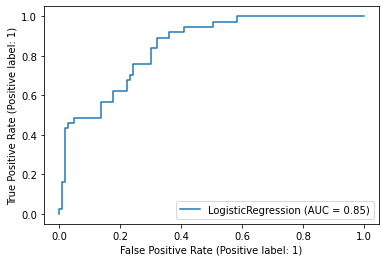

In [107]:
plot_roc_curve(logreg, X_test, y_test)

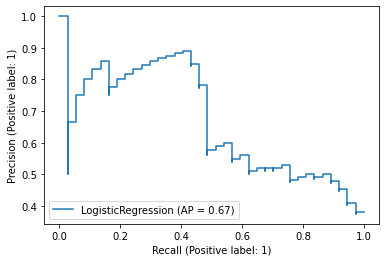

In [108]:
plot_precision_recall_curve(logreg, X_test, y_test)

> ## Simple Hyperprameter Tuning

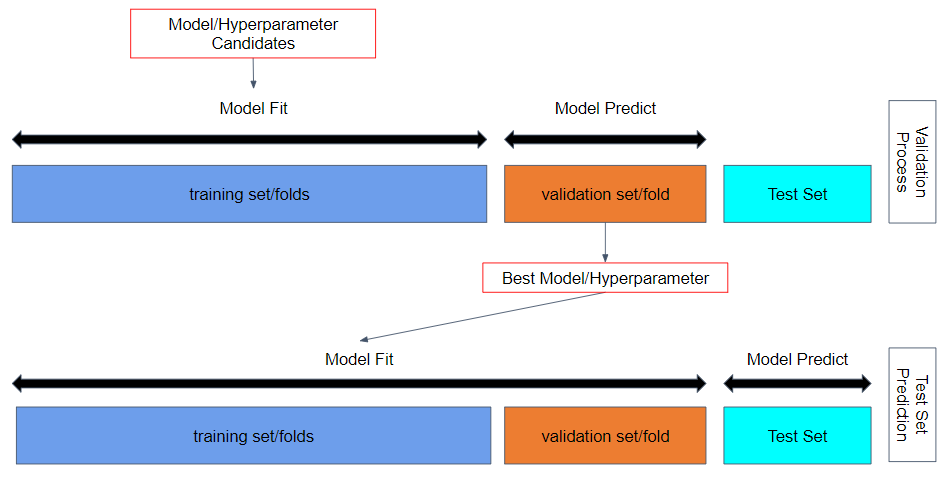

In [109]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train 60 %
X_val 20 %
X_test 20 %

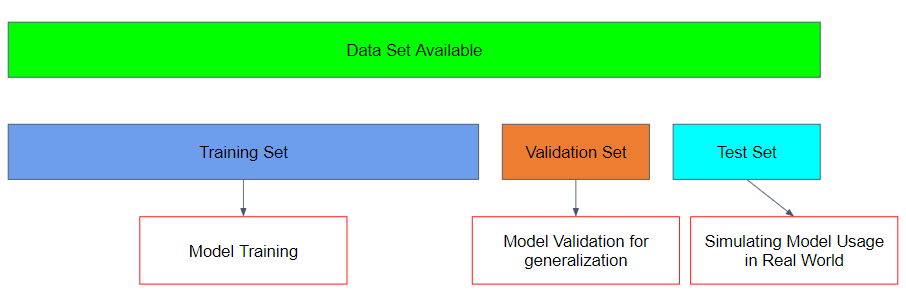

In [110]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    stratify = y_train_val,
    test_size = 0.25, # 25 % of train_val set equal to 20 % of all data set 
    random_state = 2020)

In [111]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001] # C = 1 is our benchmark
skfold = StratifiedKFold(n_splits = 5)

best_score = 0
cv_score_validation_fold = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  cv_score = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring = 'f1').mean()
  cv_score_validation_fold.append(cv_score)

  if cv_score > best_score:
    best_score = cv_score
    best_paramas = {'C':i}

In [112]:
print('best score',best_score)
print('best params',best_paramas)

best score 0.5563225088777649
best params {'C': 0.05}


In [113]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

training_score = []
testing_score = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  logreg.fit(X_train,y_train)

  y_predict_train = logreg.predict(X_train)
  training_score.append(f1_score(y_train,y_predict_train))

  y_predict_val = logreg.predict(X_val)
  testing_score.append(f1_score(y_val,y_predict_val))

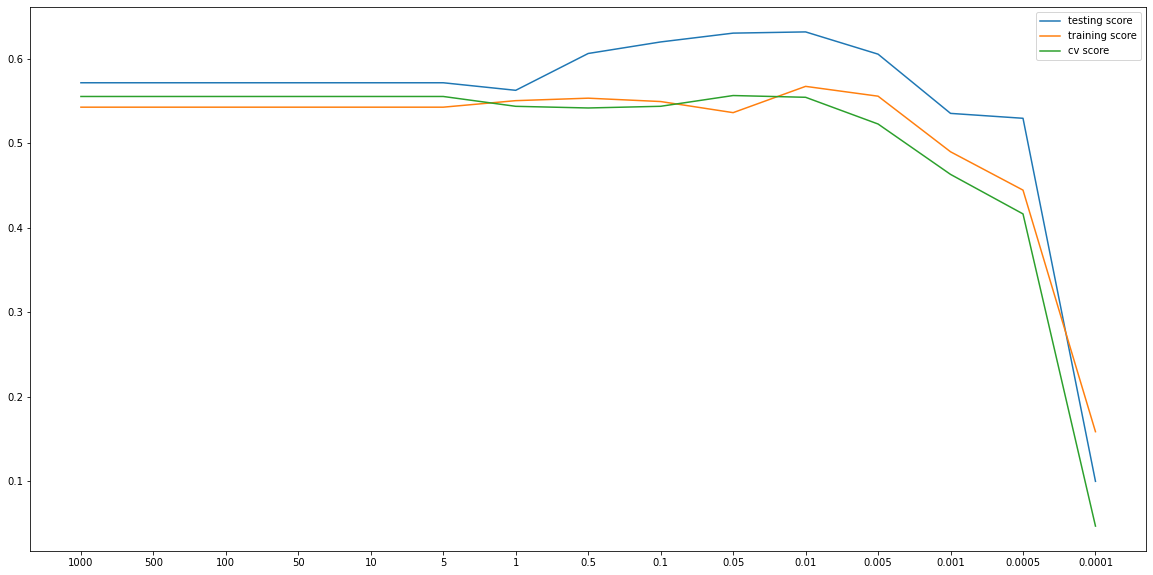

In [114]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,testing_score)
sns.lineplot(length,training_score)
sns.lineplot(length,cv_score_validation_fold)
plt.legend(['testing score','training score','cv score'])
plt.xticks(length,hyperparam_c)
plt.show()

> ## Final Result Comparison : Simple Hyperparameter Tuning

FINAL MODEL PERFORMANCE BEFORE

In [115]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



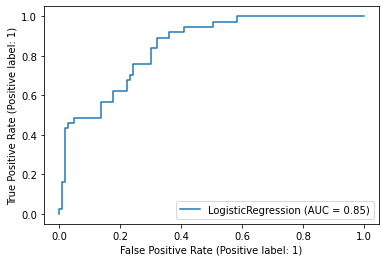

In [116]:
plot_roc_curve(logreg, X_test, y_test)

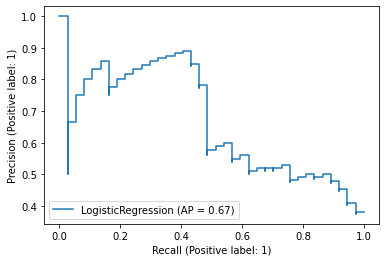

In [117]:
plot_precision_recall_curve(logreg, X_test, y_test)

FINAL MODEL PERFORMACE AFTER

In [118]:
logreg = LogisticRegression(solver = 'liblinear', C = 0.05)
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



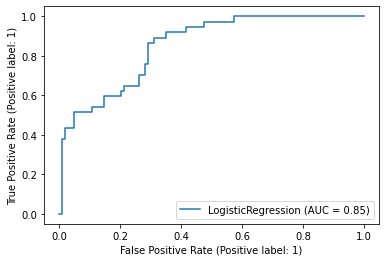

In [119]:
plot_roc_curve(logreg, X_test, y_test)

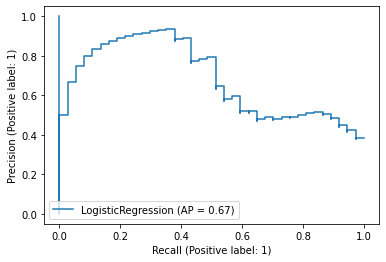

In [120]:
plot_precision_recall_curve(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
1. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we are gonna try this)

> ## Hyperparameter Tuning Grid Search

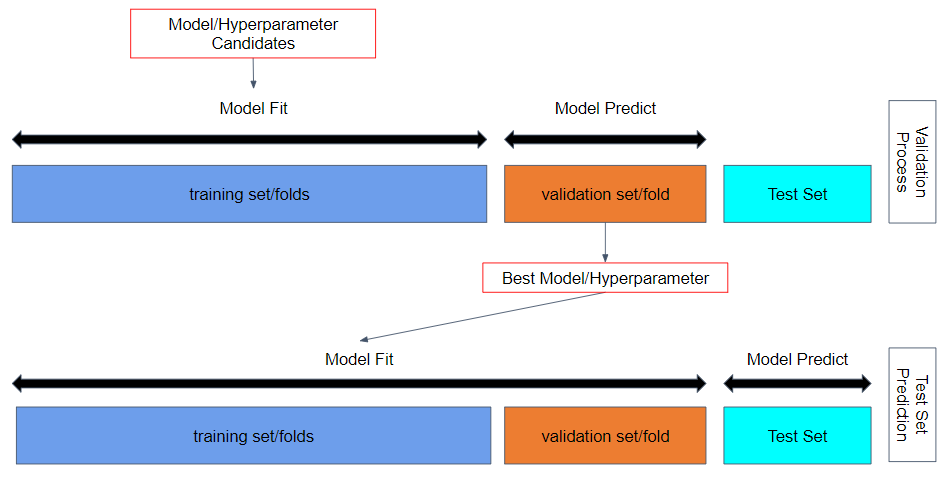

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

1. C  15 hyperparameters
1. max_iter 6 15 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times 

In [123]:
skfold = StratifiedKFold(n_splits = 5)

logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)

grid_search = GridSearchCV(
    logreg, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [124]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [125]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.5563225088777649
best param {'C': 0.05, 'max_iter': 100}


In [126]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018056,0.005939,0.005785,0.000746,1000,100,"{'C': 1000, 'max_iter': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
1,0.012367,0.002931,0.006981,0.001995,1000,200,"{'C': 1000, 'max_iter': 200}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
2,0.010769,0.000982,0.008027,0.002238,1000,300,"{'C': 1000, 'max_iter': 300}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
3,0.010971,0.002185,0.007979,0.003025,1000,400,"{'C': 1000, 'max_iter': 400}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
4,0.009575,0.000797,0.006781,0.001163,1000,500,"{'C': 1000, 'max_iter': 500}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.012765,0.000748,0.009375,0.001017,0.0001,200,"{'C': 0.0001, 'max_iter': 200}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
86,0.011969,0.000632,0.009770,0.000745,0.0001,300,"{'C': 0.0001, 'max_iter': 300}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
87,0.012767,0.001322,0.009773,0.001465,0.0001,400,"{'C': 0.0001, 'max_iter': 400}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
88,0.012966,0.001261,0.009775,0.000399,0.0001,500,"{'C': 0.0001, 'max_iter': 500}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85


This method still resulted in C = 0.05 max_iter = 100 which is basically the same. so no effect in adding max_iter. you can use another method or more FE. 

> ## Final Result Comparison : Hyperparameter Tuning Grid Search

FINAL MODEL PERFORMANCE BEFORE

In [127]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



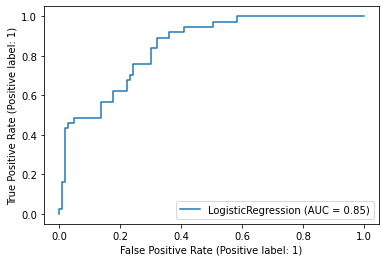

In [128]:
plot_roc_curve(logreg, X_test, y_test)

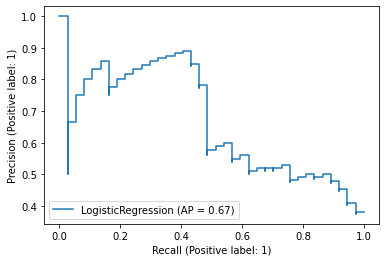

In [129]:
plot_precision_recall_curve(logreg, X_test, y_test)

FINAL MODEL PERFORMACE AFTER

In [130]:
logreg = grid_search.best_estimator_
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



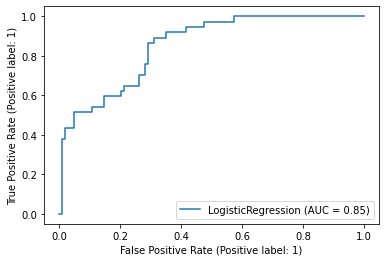

In [131]:
plot_roc_curve(logreg, X_test, y_test)

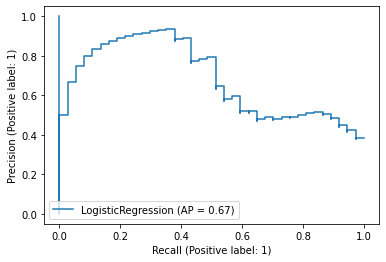

In [132]:
plot_precision_recall_curve(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
1. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we aleready try this, either try again or try 1 or 2)

# Model Performance and Evaluation Method : tips dataset

> ## Data

In [133]:
import pandas as pd
import numpy as np

In [134]:
tips = sns.load_dataset('tips')

In [135]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Data Splitting

In [136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [137]:
X = pd.get_dummies(tips.drop('tip', axis = 1))
y = tips['tip']

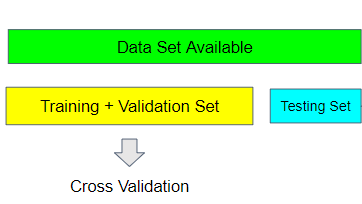

In [138]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2, 
    random_state = 2020)

> ## Model Evaluation : Benchmark

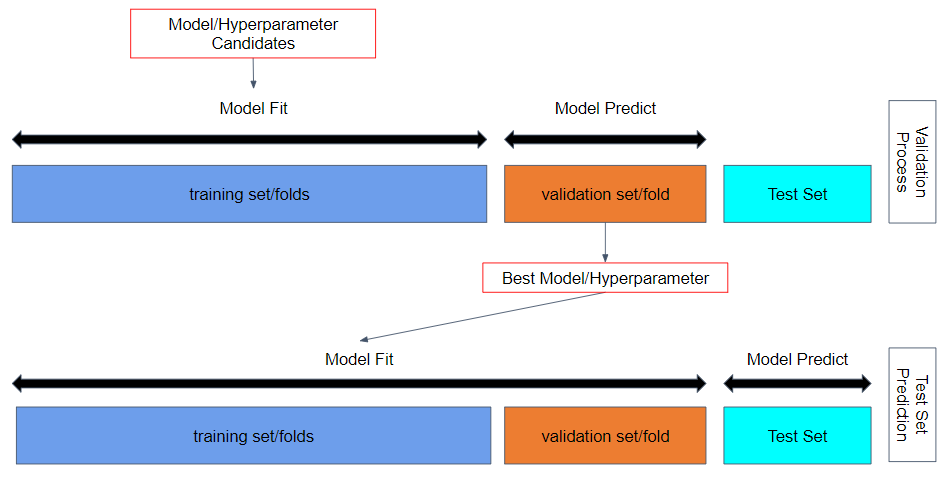

In [139]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 2020)
linreg = LinearRegression()

In [140]:
from sklearn.metrics import SCORERS

In [141]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

In [142]:
from sklearn.model_selection import cross_val_score
import warnings

In [143]:
model_cv = cross_val_score(tree, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [144]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV score mean -1.2432694552627068
CV score std 0.28004351146399903


In [145]:
model_cv = cross_val_score(linreg, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [146]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]
CV score mean -1.132021480300669
CV score std 0.33933163195266297


MODEL PERFORMACE

In [147]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5)
tree.fit(X_train_val,y_train_val)

DecisionTreeRegressor(max_depth=5)

In [148]:
y_pred = tree.predict(X_test)

In [149]:
print(mean_squared_error(y_test,y_pred))

1.4808803946104498


<AxesSubplot:ylabel='tip'>

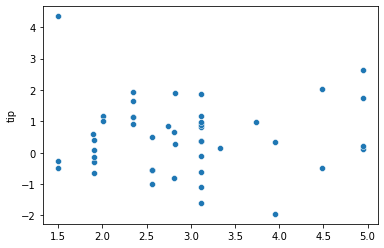

In [150]:
residuals = y_test - y_pred

sns.scatterplot(y_pred, residuals)

> ## Hyperparameter Tuning Randomized Search

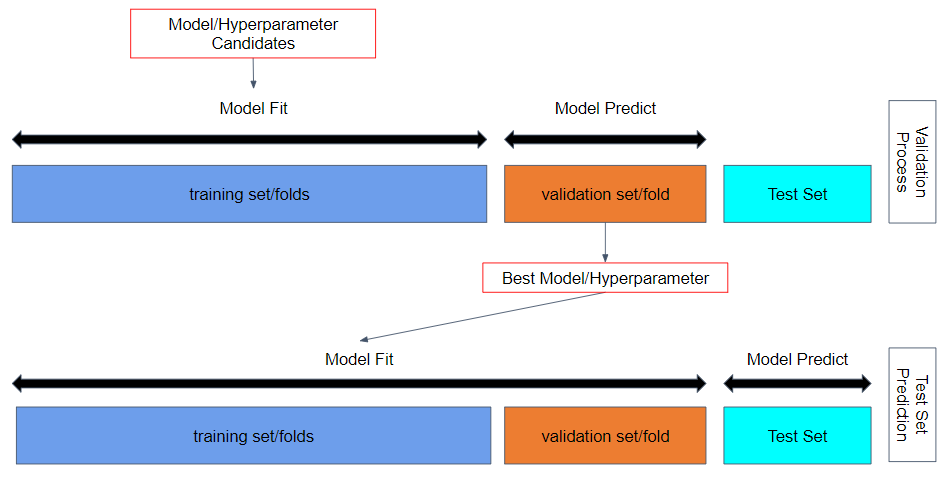

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
from sklearn.model_selection import RandomizedSearchCV

In [153]:
hyperparam_space = {
    'min_samples_leaf':[1,5,10,15,20,50], # benck mark min_samples_leaf = 1
    'max_depth':[2,3,4,5,6,7], # bench mark max_depth = 5
    'criterion':['mse','mae']
}

1. min_samples_leaf  6 hyperparameters
1. max_depht 5 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 6*5*5 = 150 times 

In [154]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 2020)

randomized_search = RandomizedSearchCV(
    tree, # model to tune
    param_distributions = hyperparam_space, # hyperparameter space
    n_iter = 20,
    cv = 5, # evaluation method
    scoring = 'neg_mean_squared_error', # metrics
    random_state = 2020,
    n_jobs = -1 # use all cores
)

In [155]:
randomized_search.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error')

In [156]:
print('best score',randomized_search.best_score_)
print('best param',randomized_search.best_params_)

best score -0.9829038972124049
best param {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}


In [157]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013963,0.001545,0.010373,0.002998,1,2,mae,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.738330,-0.851707,-1.323954,-1.509013,-1.356648,-1.155931,0.303358,3
1,0.013763,0.002309,0.008377,0.003815,5,7,mse,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.266981,-0.767827,-1.325200,-2.239966,-1.472244,-1.414444,0.475952,19
2,0.012167,0.001596,0.009774,0.008088,5,4,mse,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-1.144108,-0.817462,-1.375826,-2.197390,-1.445703,-1.396098,0.456784,18
3,0.013364,0.001353,0.008577,0.002410,20,2,mae,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",-0.722048,-1.093600,-1.182453,-1.955167,-1.356648,-1.261983,0.403899,6
4,0.015956,0.002601,0.010971,0.009009,5,2,mae,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",-0.722048,-1.093600,-1.215538,-1.960931,-1.356648,-1.269753,0.404778,8
5,0.009375,0.000488,0.008378,0.002999,50,7,mse,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
6,0.009174,0.001467,0.006383,0.001850,1,4,mse,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",-0.771622,-0.665101,-1.593723,-1.029129,-0.854944,-0.982904,0.327795,1
7,0.009375,0.001494,0.005187,0.000745,5,3,mse,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.987999,-0.897975,-1.295115,-2.212884,-1.413923,-1.361579,0.466126,14
8,0.011968,0.000632,0.007181,0.000978,20,4,mae,"{'min_samples_leaf': 20, 'max_depth': 4, 'crit...",-0.805774,-1.082392,-1.204603,-1.997315,-1.332621,-1.284541,0.396694,9
9,0.009773,0.000746,0.006384,0.000488,1,2,mse,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.816130,-0.882642,-1.424336,-1.108872,-0.924132,-1.031222,0.219261,2


Try again and change random_state in Randomized Search

> ## Final Result Comparison

FINAL MODEL PERFORMANCE BEFORE

In [158]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5)
tree.fit(X_train_val,y_train_val)
y_pred = tree.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.222193309151266


FINAL MODEL PERFORMACE AFTER

In [159]:
tree_final = randomized_search.best_estimator_
tree_final.fit(X_train_val,y_train_val)
y_pred = tree_final.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.3093536770005814


Hyperparameter tuning decrease mse from 1.48 to 1.28

# Information Leakage

In [160]:
import numpy as np
import pandas as pd

In [161]:
rnd = np.random.RandomState(seed = 2020)
X = rnd.normal(size = (100, 10000)) 
y = rnd.normal(size = (100, ))

Data generated with condition that there is no relationship between X and y

> ## Information Leakage

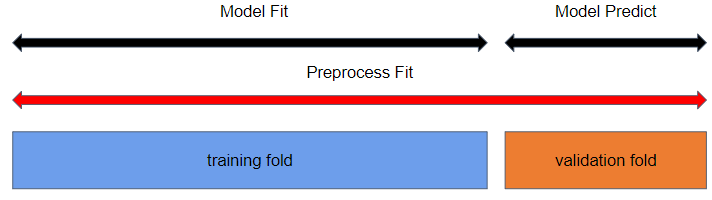

In [162]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
X_selected.shape

(100, 500)

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [164]:
cross_val_score(Ridge(), X_selected, y, cv = 5)

array([0.92165345, 0.89445668, 0.92827414, 0.93088559, 0.91044624])

This result indicating a very good model while data generated entirely random. weird isn't it ?

> ## No Information Leakage

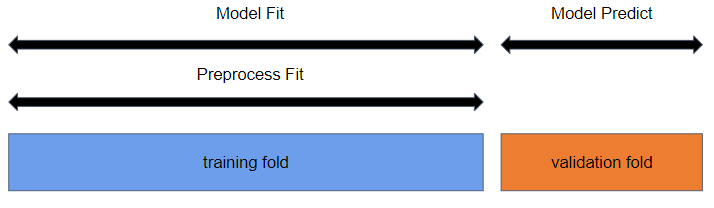

In [165]:
from sklearn.pipeline import Pipeline

In [166]:
select = SelectPercentile(score_func=f_regression, percentile=5)

pipe = Pipeline([
                 ("select", select),
                 ("ridge", Ridge())
])

In [167]:
cross_val_score(pipe, X, y, cv = 5)

array([-0.0330359 , -0.07840338, -0.06731106, -0.04544685, -0.07314928])

this is what the result should be the R-square is vary small or even negative. Information leakege show that the model can have overly optimistic result to validation folds.

# Algorithm Chains : adult dataset

> ## Data

In [168]:
!pip install category_encoders

In [169]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [170]:
df_adult = pd.read_csv('adult.csv')

In [171]:
df_adult.replace('?',np.nan,inplace = True)

In [172]:
df_adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

> ## Preprocessing

In [173]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [174]:
X = df_adult.drop(columns = ['fnlwgt','income','education'])
y = np.where(df_adult['income']=='>50K',1,0)

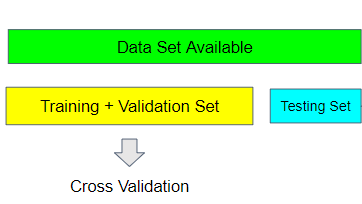

In [175]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 2020)

> ## Model Evaluation : Benchmark  

In [176]:
skfold = StratifiedKFold(n_splits = 5)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',tree)
])

In [177]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring = 'f1')

In [178]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV score mean 0.6079607686024484
CV score std 0.011833711368265581


FLEXIBLE METRICS

In [179]:
def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)])
  model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv = skfold, scoring = metric)
  return model_cv

In [180]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())

In [181]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.60656541 0.66259398 0.63331714 0.64190476 0.6657277 ]
CV score mean 0.6420217999511287
CV score std 0.021531952308743437


In [182]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV score mean 0.6079607686024484
CV score std 0.011833711368265581


MODEL PERFORMANCE

In [183]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])
estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                    

In [184]:
y_pred = estimator.predict(X_test)

In [185]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.5877551020408164
precision 0.7332908975175048
f1 0.6525063721325404


In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [187]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

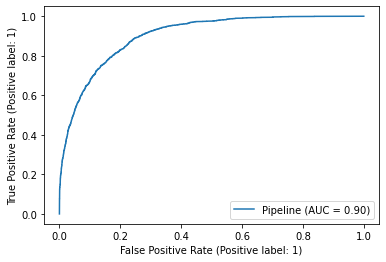

In [188]:
plot_roc_curve(estimator, X_test, y_test)

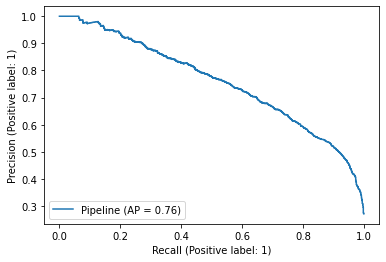

In [189]:
plot_precision_recall_curve(estimator, X_test, y_test)

> ## Hyperparameter Tuning

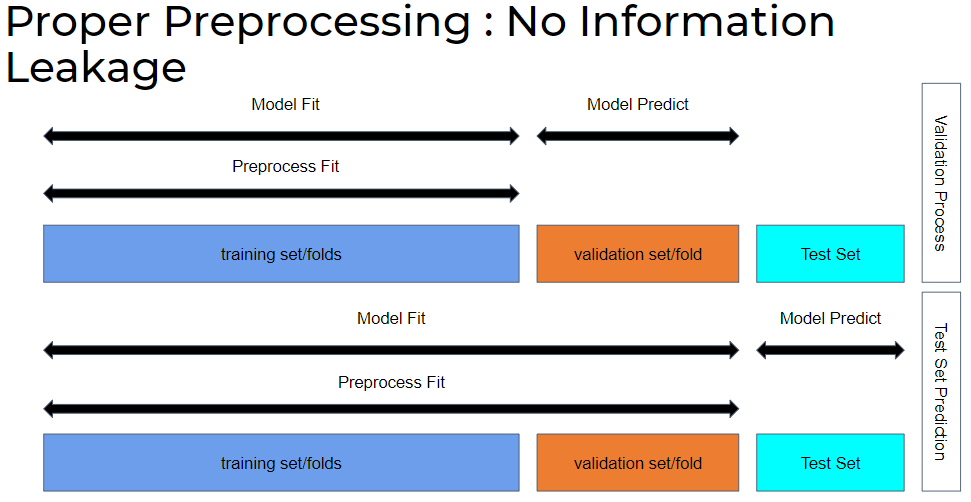

In [190]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

hyperparam_space = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

skfold = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [191]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
                

In [192]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6460237640462658
best param {'clf__C': 100, 'clf__solver': 'newton-cg'}


In [193]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.457337,0.065927,0.147407,0.009448,100,liblinear,"{'clf__C': 100, 'clf__solver': 'liblinear'}",0.606654,0.659765,0.632089,0.642185,0.665728,0.641284,0.021089,7
1,13.149127,1.353667,0.100280,0.004836,100,newton-cg,"{'clf__C': 100, 'clf__solver': 'newton-cg'}",0.625773,0.665730,0.628846,0.642790,0.666980,0.646024,0.017568,1
2,1.879056,0.129319,0.128257,0.011008,10,liblinear,"{'clf__C': 10, 'clf__solver': 'liblinear'}",0.606654,0.661972,0.631783,0.640842,0.665728,0.641396,0.021518,6
3,9.610624,1.124292,0.108510,0.010448,10,newton-cg,"{'clf__C': 10, 'clf__solver': 'newton-cg'}",0.625119,0.665730,0.628846,0.643093,0.666980,0.645954,0.017710,2
4,1.554674,0.145128,0.117486,0.018958,1,liblinear,"{'clf__C': 1, 'clf__solver': 'liblinear'}",0.606565,0.662594,0.633317,0.641905,0.665728,0.642022,0.021532,5
5,7.132590,0.515131,0.108510,0.009961,1,newton-cg,"{'clf__C': 1, 'clf__solver': 'newton-cg'}",0.624762,0.664477,0.627526,0.642756,0.666353,0.645175,0.017636,3
6,1.709411,0.224304,0.111103,0.008547,0.1,liblinear,"{'clf__C': 0.1, 'clf__solver': 'liblinear'}",0.601779,0.646890,0.627259,0.637363,0.644380,0.631534,0.016361,8
7,6.047809,0.298534,0.100350,0.014838,0.1,newton-cg,"{'clf__C': 0.1, 'clf__solver': 'newton-cg'}",0.622778,0.661633,0.623188,0.644550,0.664775,0.643385,0.018025,4
8,1.515065,0.137504,0.115889,0.020579,0.01,liblinear,"{'clf__C': 0.01, 'clf__solver': 'liblinear'}",0.578785,0.572340,0.562803,0.578053,0.596013,0.577599,0.010837,10
9,4.805954,0.285140,0.104663,0.008666,0.01,newton-cg,"{'clf__C': 0.01, 'clf__solver': 'newton-cg'}",0.615007,0.636719,0.605144,0.625490,0.652724,0.627017,0.016613,9


> ## Final Result Comparison

MODEL PERFORMANCE BEFORE

In [194]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                    

In [195]:
y_pred = estimator.predict(X_test)

In [196]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.5877551020408164
precision 0.7332908975175048
f1 0.6525063721325404


In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [198]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

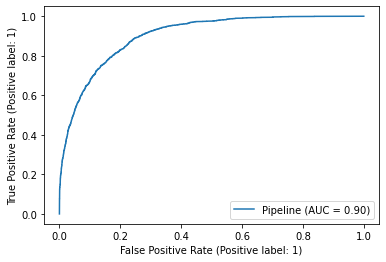

In [199]:
plot_roc_curve(estimator, X_test, y_test)

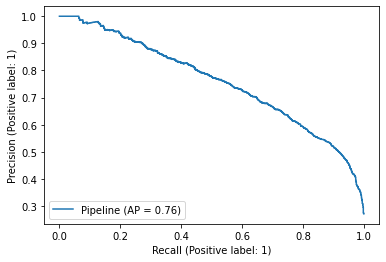

In [200]:
plot_precision_recall_curve(estimator, X_test, y_test)

MODEL PERFORMANCE AFTER

In [201]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                    

In [202]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [203]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.5984693877551021
precision 0.7276674937965261
f1 0.6567749160134378


In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.60      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



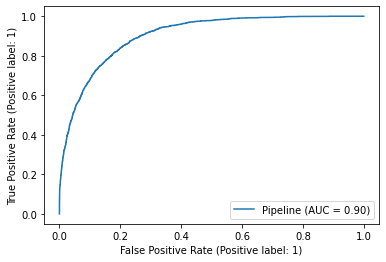

In [205]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

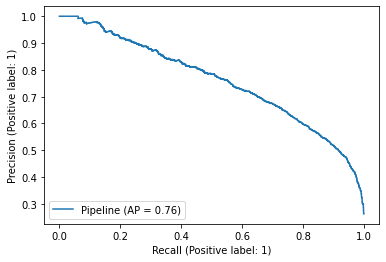

In [206]:
plot_precision_recall_curve(grid_search.best_estimator_, X_test, y_test)

f1 score slightly increase from 0.6527 to 0.6567